# 2.Logistic Regression
I will implement logistic regression and apply it to two different datasets.

In [27]:
import os
from matplotlib import pyplot
import numpy as np
import utils
from scipy import optimize

%matplotlib inline


## 1. Logistic Regression

In this part, I will build a logistic regression model to predict whether a student gets admitted into a university. Suppose that I am the administrator of a university department and
I want to determine each applicant’s chance of admission based on their results on two exams. I have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions
decision. My task is to build a classification model that estimates an applicant’s probability of admission based the scores from those two exams. 

In [4]:
#Loading data
data= np.loadtxt(os.path.join("Data","ex2data1.txt"),delimiter=',')
X=data[:,:2] #exam scores
y=data[:,2] #label

### 1.1 Visualizing the data
It is always good to firstly visualize the data.

Text(0, 0.5, '2 score')

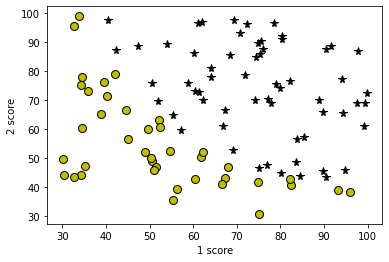

In [5]:

def plotData(X,y):
    """
    Plots the data points X and y into a new figure. Plots the data 
    points with * for the positive examples and o for the negative examples.
    """
    fig=pyplot.figure()
    
    pyplot.plot(X[y==1,0],X[y==1,1], 'k*',lw=2, ms=8)
    pyplot.plot(X[y==0,0],X[y==0,1],'ko',mfc='y',ms=8)

    
plotData(X,y)
pyplot.xlabel("1 score")
pyplot.ylabel("2 score")



<a id="section1"></a>
### 1.2 Implementation
#### 1.2.1. Sigmoid function

Llogistic regression hypothesis is defined as:

$$ h_\theta(x) = g(\theta^T x)$$

where function $g$ is the sigmoid function. The sigmoid function is defined as: 

$$g(z) = \frac{1}{1+e^{-z}}$$.

In [12]:
def sigmoid(z):
    z=np.array(z)
    
    g=np.zeros(z.shape)
    
    return (1/(1+np.exp(-z)))

sigmoid([1,2,3,4,5])

array([0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.99330715])

In [8]:
sigmoid(0) #testing sigmoid function

0.5

#### 1.2.2 Cost function and gradient

In [8]:
#setting data matrix
m,n=X.shape 

In [9]:
#intercept term
X=np.concatenate([np.ones((100,1)),X],axis=1)


The cost function in logistic regression is

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left[ -y^{(i)} \log\left(h_\theta\left( x^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - h_\theta\left( x^{(i)} \right) \right) \right]$$

and the gradient of the cost is a vector of the same length as $\theta$ where the $j^{th}$
element (for $j = 0, 1, \cdots , n$) is defined as follows:

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} $$

In [10]:
def costFunction(theta,X,y):
    """
    Compute cost and gradient for logistic regression. 
    """
    m=y.size
    grad = np.zeros(theta.shape)
    h = sigmoid(X.dot(theta.T))
    J=0
    #J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    J=(1/m) *np.sum(-y.dot(np.log(h))-(1-y).dot(np.log(1-h)))
    grad =(1/m) * (h-y).dot(X)
    
    return J, grad

In [16]:

theta=np.zeros(n+1)
theta
print('Cost and gradient at theta=0:')
cost, grad=costFunction(theta,X,y)
print("cost {:.3f}".format(cost))
print("grad {:.4f} {}{}".format(*grad))


print('\nCost and gradient at testing theta:' )
test_theta=np.array([-23,0.2,0.2])
cost, grad=costFunction(test_theta,X,y)
print("cost {:.3f}".format(cost))
print("grad {:.4f} {}{}".format(*grad))


Cost and gradient at theta=0
cost 0.693
grad -0.1000 -12.009216589291153-11.262842205513593

Cost and gradient at testing theta:
cost 0.293
grad 0.1055 6.2482368689398346.348274675139154


#### 1.2.3 Learning parameters using `scipy.optimize`

In [17]:
#optimizing theta with scipy
res=optimize.minimize(costFunction,theta,(X,y),
                      jac=True, method='TNC',
                     options={'maxiter':400})

In [18]:
cost=res.fun
print('Cost at theta found by optimize.minimize: {:.3f}'.format(cost))
print('Expected cost (approx): 0.203\n');

theta = res.x
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta))
print('Expected theta (approx):\n\t[-25.161, 0.206, 0.201]')

Cost at theta found by optimize.minimize: 0.203
Expected cost (approx): 0.203

	[-25.161, 0.206, 0.201]
Expected theta (approx):
	[-25.161, 0.206, 0.201]


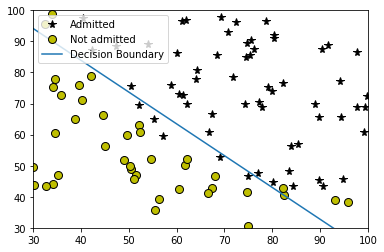

In [19]:
# Plot Boundary
utils.plotDecisionBoundary(plotData, theta, X, y)

#### 1.2.4 Evaluating logistic regression

After learning the parameters, you can use the model to predict whether a particular student will be admitted. For a student with an Exam 1 score of 45 and an Exam 2 score of 85, you should expect to see an admission
probability of 0.776. Another way to evaluate the quality of the parameters we have found is to see how well the learned model predicts on our training set. In this part, your task is to complete the code in function `predict`. The predict function will produce “1” or “0” predictions given a dataset and a learned parameter vector $\theta$. 

In [21]:
def predict(theta,X):
    """
    Predict whether the label is 0 or 1 using learned logistic regression.
    Computes the predictions for X using a threshold at 0.5 
    """
    return np.round(sigmoid(X.dot(theta.T)))
    

In [22]:
n=np.array([1,45,85])
print("{:.2f}".format(sigmoid(n.dot(theta))))#prediction for student with scores 45 and 85 
np.mean(predict(theta,X)==y) #train accuracy

0.78


0.89

## 2 Regularized logistic regression
In this part I will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly.
Suppose there is product manager of the factory and he have the test results for some microchips on two different tests. From these two tests, I would like to determine whether the microchips should be accepted or rejected. 

In [23]:
data=np.loadtxt(os.path.join("Data","ex2data2.txt"),delimiter=',')
X=data[:,0:2]
y=data[:,2]

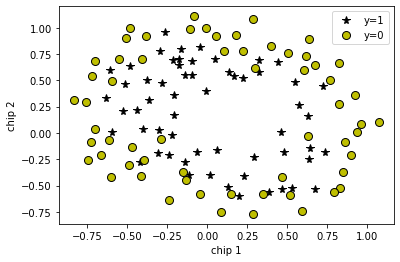

In [24]:
plotData(X,y)
pyplot.xlabel("chip 1")
pyplot.ylabel("chip 2")
pyplot.legend(['y=1','y=0'],loc='upper right')

### 2.1 Feature mapping

One way to fit the data better is to create more features from each data point. In the function `mapFeature` defined in the file `utils.py`, I will map the features into all polynomial terms of $x_1$ and $x_2$ up to the sixth power.

$$ \text{mapFeature}(x) = \begin{bmatrix} 1 & x_1 & x_2 & x_1^2 & x_1 x_2 & x_2^2 & x_1^3 & \dots & x_1 x_2^5 & x_2^6 \end{bmatrix}^T $$

As a result of this mapping, our vector of two features (the scores on two QA tests) has been transformed into a 28-dimensional vector.

In [28]:
X=utils.mapFeature(X[:,0],X[:,1])

### 2.2. Cost function and gradient

Now you will implement code to compute the cost function and gradient for regularized logistic regression. Complete the code for the function `costFunctionReg` below to return the cost and gradient.

Recall that the regularized cost function in logistic regression is

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^m \left[ -y^{(i)}\log \left( h_\theta \left(x^{(i)} \right) \right) - \left( 1 - y^{(i)} \right) \log \left( 1 - h_\theta \left( x^{(i)} \right) \right) \right] + \frac{\lambda}{2m} \sum_{j=1}^n \theta_j^2 $$

Note that you should not regularize the parameters $\theta_0$. The gradient of the cost function is a vector where the $j^{th}$ element is defined as follows:

$$ \frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left(x^{(i)}\right) - y^{(i)} \right) x_j^{(i)} \qquad \text{for } j =0 $$

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \left( \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left(x^{(i)}\right) - y^{(i)} \right) x_j^{(i)} \right) + \frac{\lambda}{m}\theta_j \qquad \text{for } j \ge 1 $$
<a id="costFunctionReg"></a>

In [29]:
def costFunctionReg(theta,X,y,lambda_):
    """
    Compute cost and gradient for logistic regression with regularization.
    """
    m=y.size
    J=0
    grad=np.zeros(theta.shape)
    
    
    h= sigmoid(X.dot(theta.T))
    temp=theta
    temp[0]=0
    
    J=(1/m )*np.sum(-y.dot(np.log(h)) -(1-y).dot(np.log(1-h))) + (lambda_/(2*m))*np.sum(theta*theta)
    
    grad=1/m * (h-y).dot(X)
    grad=grad + (lambda_/m)*theta
    return J, grad
    

In [30]:
(X.shape)
theta=np.zeros(X.shape[1])
lambda_=1
cost, grad =costFunctionReg(theta,X,y,lambda_)

In [33]:
print('Cost at initial theta (zeros): {:.3f}'.format(cost))
print('Gradient: \t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad[:5]))

Cost at initial theta (zeros): 3.165
Gradient: 	[0.3460, 0.1614, 0.1948, 0.2269, 0.0922]


In [34]:
test_theta=np.ones(X.shape[1])
cost, grad =costFunctionReg(test_theta,X,y,10)
print('Cost at initial theta (ones): {:.3f}'.format(cost))
print('Gradient: \t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad[:5]))

Cost at initial theta (ones): 3.165
Gradient: 	[0.3460, 0.1614, 0.1948, 0.2269, 0.0922]


### 2.3. Plotting the decision boundary
I will get to try out different regularization parameters for the dataset to understand how regularization prevents overfitting.


66.94915254237289

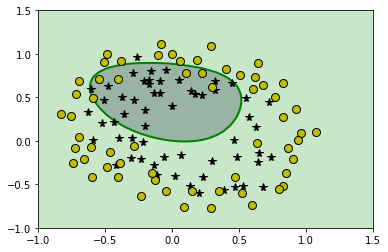

In [32]:
theta=np.zeros(X.shape[1])
lambda_=4.00
options={'maxiter':100}
res=optimize.minimize(costFunctionReg, theta, (X,y, lambda_),jac=True, method='TNC',options=options)

cost=res.fun
theta=res.x
utils.plotDecisionBoundary(plotData,theta,X,y)
p=predict(theta,X)
np.mean(p==y)*100